In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.metrics import classification_report
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn import set_config
set_config(transform_output="pandas")

In [88]:
# Reading the dataset
file_path = 'C:/Users/15199/DSI/rk_team_project/data.csv'
df = pd.read_csv(file_path)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_temp,avg_glucose_level_temp,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,3,3,1,1,2,1,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.007143,never smoked,1,3,3,0,1,3,0,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,3,1,1,1,2,0,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,2,2,0,1,2,1,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,3,2,0,1,3,0,2


In [89]:
numerical = ['age', 'avg_glucose_level', 'bmi', 'gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'Residence_type_encoded', 'smoking_status_encoded', 'hypertension', 'heart_disease']
target = ['stroke', 'hypertension', 'heart_disease']

In [90]:
# Correlation with target
corr = df[numerical + ['stroke']].corr()
print(corr['stroke'])

age                       0.245257
avg_glucose_level         0.131945
bmi                       0.042274
gender_encoded            0.008929
ever_married_encoded      0.108340
work_type_encoded        -0.032316
Residence_type_encoded    0.015458
smoking_status_encoded    0.028123
hypertension              0.127904
heart_disease             0.134914
stroke                    1.000000
Name: stroke, dtype: float64


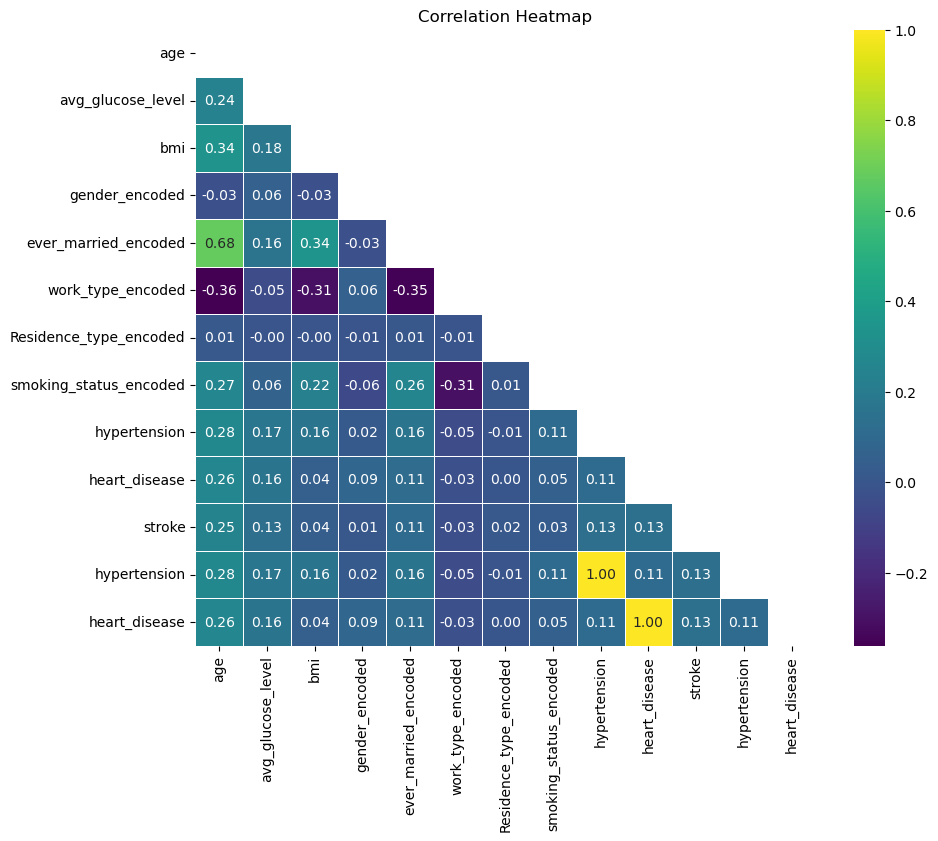

In [91]:
columns = numerical + target

corr_matrix = df[columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", linewidths=0.5, fmt=".2f", mask=mask)

plt.title('Correlation Heatmap')
plt.show()

Logistic Regression to predict Stroke

In [92]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(df[numerical], df[target], test_size=0.20, random_state=42)

In [93]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train.head()

,age,avg_glucose_level,bmi,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded,hypertension,heart_disease
802,1.584155,0.135593,-0.061125,1.192995,0.726005,0.771792,-1.023265,-0.352725,-0.321981,-0.236189
3927,0.829708,-0.397457,0.938575,-0.838227,0.726005,-0.142991,0.977264,-1.285415,-0.321981,-0.236189
2337,-0.989841,-1.028701,0.605341,-0.838227,-1.377402,-0.142991,-1.023265,0.579965,-0.321981,-0.236189
3910,-0.546049,-0.893246,0.182391,1.192995,0.726005,-1.972556,0.977264,-0.352725,-0.321981,-0.236189
1886,-0.546049,-1.026290,-1.163358,-0.838227,-1.377402,-0.142991,-1.023265,0.579965,-0.321981,-0.236189


Class Imbalance

In [94]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train['stroke'])

LogisticRegression()

In [95]:
y_test['y_pred'] = logistic_regression.predict(x_test)
y_test.head()

,stroke,hypertension,heart_disease,y_pred
4688,0,0,0,0
4478,0,0,0,0
3849,0,0,0,0
4355,0,1,0,0
3826,0,0,0,0


In [96]:
print(f"Classification Report:\n{classification_report(y_test['stroke'], y_test['y_pred'], labels=[1])}")

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        62

   micro avg       0.00      0.00      0.00        62
   macro avg       0.00      0.00      0.00        62
weighted avg       0.00      0.00      0.00        62



In [97]:
# Accuracy = (True Positives + True Negatives) / (Total)
print(f"Accuracy Score: {accuracy_score(y_test['stroke'], y_test['y_pred'])}")

# Confusion Matrix provides the breakdown of True Positives, True Negatives, False Positives, and False Negatives.
print(f"Confusion Matrix: \n{confusion_matrix(y_test['stroke'], y_test['y_pred'])}")

y_pred_prob = logistic_regression.predict_proba(x_test)[:, 1]
print(f"Area Under Curve: {roc_auc_score(y_test['stroke'], y_pred_prob)}")

# Recall = True Positives / (True Positives + False Negatives)

Accuracy Score: 0.9393346379647749
Confusion Matrix: 
[[960   0]
 [ 62   0]]
Area Under Curve: 0.8515120967741936


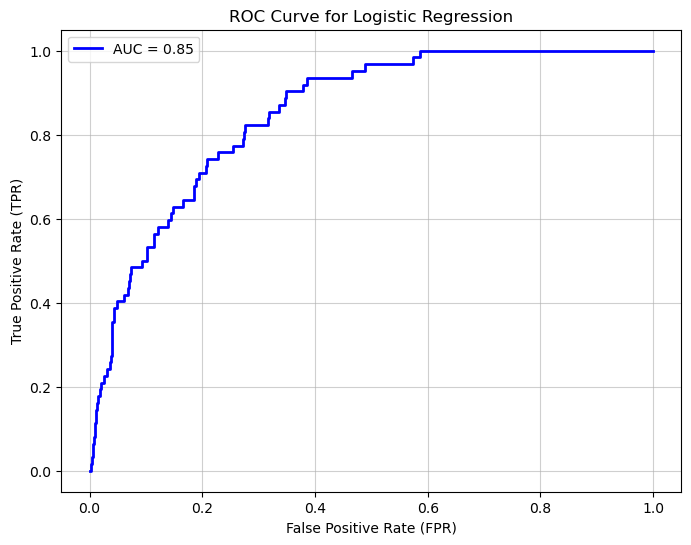

In [98]:
from sklearn.metrics import roc_curve, auc

y_true = y_test['stroke']

y_pred_prob = logistic_regression.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True, alpha=0.6) 
plt.show()



Handling Class Imbalance using class_weight parameter

In [99]:
logistic_regression1 = LogisticRegression(random_state=42, class_weight='balanced')
logistic_regression1.fit(x_train, y_train['stroke'])

y_test['y_pred1'] = logistic_regression1.predict(x_test)
y_test

,stroke,hypertension,heart_disease,y_pred,y_pred1
4688,0,0,0,0,0
4478,0,0,0,0,0
3849,0,0,0,0,0
4355,0,1,0,0,1
3826,0,0,0,0,1
...,...,...,...,...,...
3605,0,0,0,0,0
4934,0,0,0,0,0
4835,0,1,0,0,0
4105,0,0,0,0,1


In [100]:
print(f"Classification Report:\n{classification_report(y_test['stroke'], y_test['y_pred1'], labels=[1])}")

Classification Report:
              precision    recall  f1-score   support

           1       0.16      0.76      0.27        62

   micro avg       0.16      0.76      0.27        62
   macro avg       0.16      0.76      0.27        62
weighted avg       0.16      0.76      0.27        62



In [101]:
print(f"Accuracy Score: {accuracy_score(y_test['stroke'], y_test['y_pred1'])}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test['stroke'], y_test['y_pred1'])}")

y_pred_prob1 = logistic_regression.predict_proba(x_test)[:, 1]
print(f"Area Under Curve: {roc_auc_score(y_test['stroke'], y_pred_prob1)}")

Accuracy Score: 0.7504892367906066
Confusion Matrix: 
[[720 240]
 [ 15  47]]
Area Under Curve: 0.8515120967741936


SMOTE

In [102]:

y_train_stroke = y_train['stroke']

smote = SMOTE(random_state=42)
x_train_s, y_train_s = smote.fit_resample(x_train, y_train_stroke)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(x_train_s, y_train_s)

y_pred2 = model.predict(x_test)

y_pred_prob2 = model.predict_proba(x_test)[:, 1]

# Evaluate the model
print(f"Classification Report:\n{classification_report(y_test['stroke'], y_pred2, labels=[1])}")
print("ROC AUC Score:", roc_auc_score(y_test['stroke'], y_pred_prob2))
print("Confusion Matrix:\n", confusion_matrix(y_test['stroke'], y_pred2))

Classification Report:
              precision    recall  f1-score   support

           1       0.17      0.76      0.28        62

   micro avg       0.17      0.76      0.28        62
   macro avg       0.17      0.76      0.28        62
weighted avg       0.17      0.76      0.28        62

ROC AUC Score: 0.8483198924731183
Confusion Matrix:
 [[730 230]
 [ 15  47]]


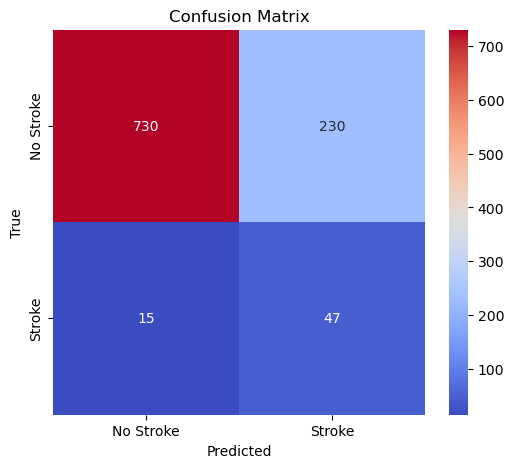

In [103]:
plt.figure(figsize=(6, 5))

cm = confusion_matrix(y_test['stroke'], y_pred2)

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()